<a href="https://colab.research.google.com/github/mykon23/DL-2020Project/blob/update_sample/Equus2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Get the Equus dataset

In [46]:
! wget -O Horse.tar.gz https://github.com/mykon23/DL-2020Project/blob/update_sample/Horse.tar.gz?raw=true
! wget -O Donkey.tar.gz https://github.com/mykon23/DL-2020Project/blob/update_sample/Donkey.tar.gz?raw=true
! wget -O Zebra.tar.gz https://github.com/mykon23/DL-2020Project/blob/update_sample/Zebra.tar.gz?raw=true

--2020-02-27 01:47:29--  https://github.com/mykon23/DL-2020Project/blob/update_sample/Horse.tar.gz?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/mykon23/DL-2020Project/raw/update_sample/Horse.tar.gz [following]
--2020-02-27 01:47:29--  https://github.com/mykon23/DL-2020Project/raw/update_sample/Horse.tar.gz
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mykon23/DL-2020Project/update_sample/Horse.tar.gz [following]
--2020-02-27 01:47:29--  https://raw.githubusercontent.com/mykon23/DL-2020Project/update_sample/Horse.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connecte

In [47]:
! ls -hl

total 65M
-rw-r--r-- 1 root root  18M Feb 27 01:47 Donkey.tar.gz
drwxr-xr-x 5 root root 4.0K Feb 27 01:25 Equus
-rw-r--r-- 1 root root  18M Feb 27 01:34 Equus.tar.gz
-rw-r--r-- 1 root root  12M Feb 27 01:47 Horse.tar.gz
drwxr-xr-x 1 root root 4.0K Feb  5 18:37 sample_data
-rw-r--r-- 1 root root  17M Feb 27 01:47 Zebra.tar.gz


In [0]:
##Create stage location
! rm -rf Equus/
! mkdir Equus

In [0]:
##Extract data into directory
! tar -zxf Horse.tar.gz -C Equus/
! tar -zxf Donkey.tar.gz -C Equus/
! tar -zxf Zebra.tar.gz -C Equus/

In [0]:
! rm *.tar.gz

In [51]:
## Display the distribution of samples
! for d in $(ls ./Equus); do samples=$(ls -l ./Equus/${d} | wc -l); echo ${d} ${samples}; done

Donkey 392
Horse 315
Zebra 340


Update Samples to Meet Square Dimensions

In [0]:
import numpy
import os
import PIL
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

##Set all the images to be of the same size
samples_dir = os.path.join('Equus', '.')
for eq_cl in os.listdir(samples_dir):
  cl_dir = os.path.join(samples_dir, eq_cl)
  for dat in os.listdir(cl_dir):
    image = Image.open(os.path.join(cl_dir, dat))
    img_p = image.resize((256, 256))
    ##overwrite existing image
    img_p.save(os.path.join(cl_dir, dat))

In [53]:
##Download the files from colab
from google.colab import files
! tar zcvf Equus.tar.gz Equus/
files.download('Equus.tar.gz')

Equus/
Equus/Zebra/
Equus/Zebra/nature-3673972__340.jpg
Equus/Zebra/zebra-2896325__340.jpg
Equus/Zebra/hartmanns-3936205__340.jpg
Equus/Zebra/hartmanns-4757925__340.jpg
Equus/Zebra/zebra-112243__340.jpg
Equus/Zebra/hartmanns-4773379__340.jpg
Equus/Zebra/animals-2179158__340.jpg
Equus/Zebra/zebra-1491253__340.jpg
Equus/Zebra/zebra-4043988__340.jpg
Equus/Zebra/zebra-253503__340.jpg
Equus/Zebra/zebra-3939815__340.jpg
Equus/Zebra/hartmanns-3927185__340.jpg
Equus/Zebra/zebra-111383__340.jpg
Equus/Zebra/zebra-1157453__340.jpg
Equus/Zebra/plains-zebra-4777643__340.jpg
Equus/Zebra/zebra-4856293__340.jpg
Equus/Zebra/kenya-1883654__340.jpg
Equus/Zebra/zebra-2283914__340.jpg
Equus/Zebra/zebra-4038214__340.jpg
Equus/Zebra/kenya-2042765__340.jpg
Equus/Zebra/hartmanns-3927182__340.jpg
Equus/Zebra/zebra-1169259__340.jpg
Equus/Zebra/zebra-448361__340.jpg
Equus/Zebra/hartmanns-4773381__340.jpg
Equus/Zebra/hartmanns-4757927__340.jpg
Equus/Zebra/zebra-653699__340.jpg
Equus/Zebra/africa-4842561__340.jpg
E

Image Data Generator

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Rescale all images by 1./255
my_generator = ImageDataGenerator(rescale=1./255)

In [56]:
# Specify how the ImageDataGenerator will read/deliver
image_generator = my_generator.flow_from_directory('./Equus', target_size=(256, 256), batch_size=18, class_mode='categorical')

Found 1044 images belonging to 3 classes.


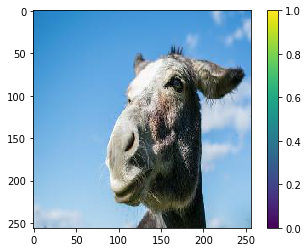

[1. 0. 0.]


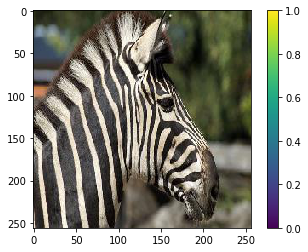

[0. 0. 1.]


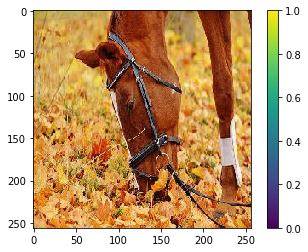

[0. 1. 0.]


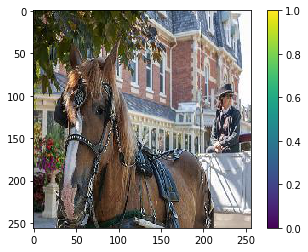

[0. 1. 0.]


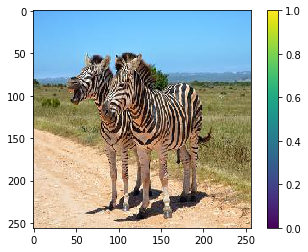

[0. 0. 1.]


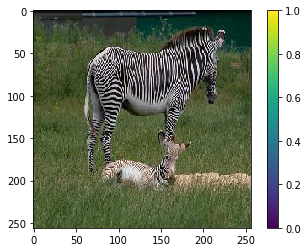

[0. 0. 1.]


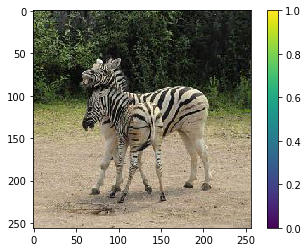

[0. 0. 1.]


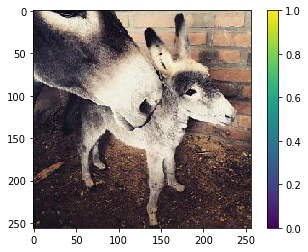

[1. 0. 0.]


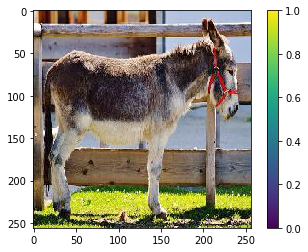

[1. 0. 0.]


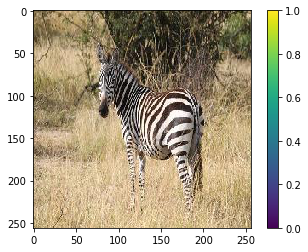

[0. 0. 1.]


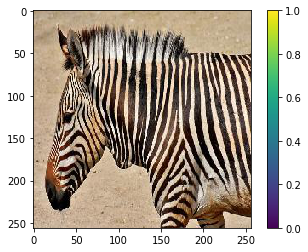

[0. 0. 1.]


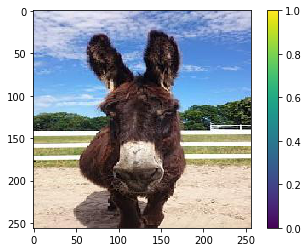

[1. 0. 0.]


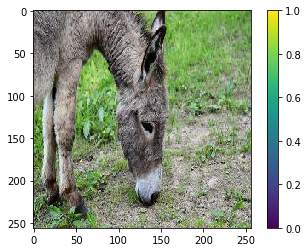

[1. 0. 0.]


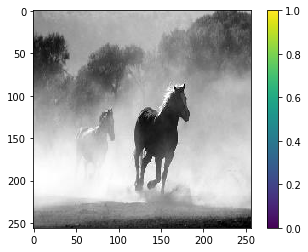

[0. 1. 0.]


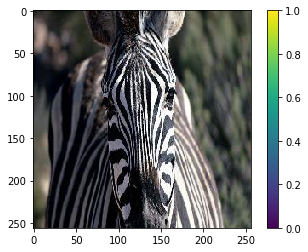

[0. 0. 1.]


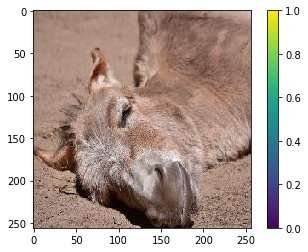

[1. 0. 0.]


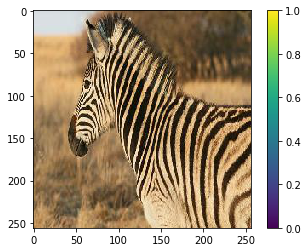

[0. 0. 1.]


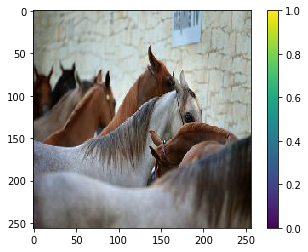

[0. 1. 0.]


In [58]:
import matplotlib.pyplot as plt

for batch in image_generator:
  images = batch[0]
  labels = batch[1]
  for i in range(len(labels)):
    plt.imshow(images[i])
    plt.colorbar()
    plt.show()
    print(labels[i])
  break